<a href="https://colab.research.google.com/github/arjan-hada/fastai/blob/master/Implementation_of_Fastai_Learner_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 720 kB 5.0 MB/s 
     |████████████████████████████████| 189 kB 38.3 MB/s 
     |████████████████████████████████| 1.2 MB 33.0 MB/s 
     |████████████████████████████████| 48 kB 918 kB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 
     |████████████████████████████████| 561 kB 60.3 MB/s 
     |████████████████████████████████| 51 kB 346 kB/s 
     |████████████████████████████████| 130 kB 47.0 MB/s 
Mounted at /content/gdrive


In [2]:
from fastai.vision.all import *
from fastbook import *
matplotlib.rc('image', cmap='Greys')

In [3]:
# Download a sample of MNIST dataset that contain images of 3s and 7s
path = untar_data(URLs.MNIST_SAMPLE)

In [14]:
# Peek inside directory using fastai ls() method
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/valid')]

In [15]:
# Peek inside the train folder
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/3'),Path('/root/.fastai/data/mnist_sample/train/7')]

In [7]:
# Peek inside the train folder's 3s and 7s
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()

In [18]:
# Create a tensor containing all the images in a directory.
# The Image class is from Python Imaging Library (PIL)
three_tensors = [tensor(Image.open(o)) for o in threes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]

len(three_tensors), len(seven_tensors)

(6131, 6265)

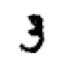

In [21]:
# Check one of the image
# Use fastai's show_image function to display tensor as image
show_image(three_tensors[0])

# Each element of the lists - three_tensors or seven_tensors is 28x28

In [32]:
# Combine all the images in the list into a single rank-3 tensor
# Normalize the pixel values to be between 0 and 1
stacked_threes = torch.stack(three_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

In [38]:
# Concatenate all the independent variable the images themselves into a single tensor
# Change from a list of matrices to a list of vectors
# Or change from a rank-3 tensor to a rank-2 tensor

train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)

In [43]:
# Dependent variable for each image - 1 for 3s and 0 for 7s
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [44]:
# A dataset in Pytorch is required to return a tuple of (x,y) when indexed

dset = list(zip(train_x, train_y))
x, y = dset[0]
x.shape, y

(torch.Size([784]), tensor([1]))

In [ ]:
# Validation dataset